# 分析测试RSA算法的不同安全参数对算法安全性的影响。
1. （p-1）和（q-1）
2. |p-q|

## （p-1）和（q-1）有很小的素因子
> 光滑数 (Smooth number)：指可以分解为小素数乘积的正整数
### p-1光滑
根据费马小定理(Fermat Theorem)，若p是素数，且p不整除a，则有：
$$a^{p-1}\equiv1 (mod\ p)$$
**B-Smooth**：如果一个整数的所有素因子都不大于B，我们称这个数为B-Smooth数

例：$12 = 2 ∗ 2 ∗ 3$ ， 所 以 12 是 B-Smooth 数 


In [103]:
import random
from Crypto.Util.number import getPrime,isPrime, sieve_base as primes
def myPrime(bits):
    while True:
        n = 2
        while n.bit_length() < bits:
            n *= random.choice(primes)
        if isPrime(n + 1):
            return n + 1
for n in range(1):
    p = myPrime(300)
    q = getPrime(300)
    N = p * q
    print(N)
import gmpy2
a = 2
n = 2
while True:
    a = pow(a, n, N)
    res = gmpy2.gcd(a-1, N)
    if res != 1 and res != N:
        q = N // res
        print("n=",n)
        print("p=",res)
        print("q=",q)
        break
    n += 1
# 成功分解大整数N

2189242295798358048627448966499875321877932458017590326577439881895240275667223747183658930583272881925863788941686175283983157722788772975071939895611125408462215693589293754345879
n= 98897
p= 2102561982746319106425229315777784678105754950488416015968537045260492997523060934657813259
q= 1041226044113486285703227121749695489343786901708416138353767301977583333218165195288294181


## |p-q| 很小

首先
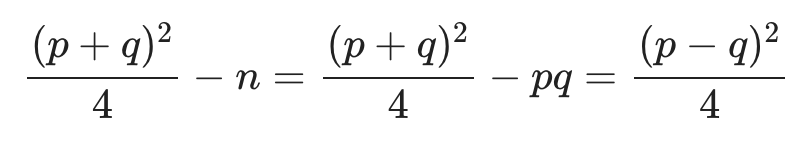

既然 $|p-q|$ 较小，那么 $\frac{(p-q)^2}{4} $ 自然也比较小，进而 $\frac{(p-q)^2}{4} $ 只是比 N 稍微大一点，所以 $\frac{p+q}{2}$ 与 $\sqrt{n}$ 相近。那么我们可以按照如下方法来分解

+ 顺序检查 $\sqrt{n}$  的每一个整数 $x$，直到找到一个 $x$ 使得 $x^2 - n$ 是平方数，记为 $y^2$ 
+ 那么 $x^2 -n = y^2$，进而根据平方差公式即可分解 $N$

In [100]:

# 两个很近的素数
p = getPrime(1024)
q = gmpy2.next_prime(p)
n=p*q
print(f'{p=}')
print(f'{q=}')
print(f'{n=}')
 
#开根号
temp=gmpy2.iroot(n,2)[0]
p1=gmpy2.next_prime(temp)
q1=n//p1
print(f'{q==p1}\t{q==q1}')
print(f'{p==p1}\t{p==q1}')
# 还原了 p/q


p=120397774837493671819388408628805547544276870988764304605854434451816842096090325044806589605854764560679960331905773559729608515805640314674350486168671887634690089559319837076956892846879164495289578060028316255571409852518756972078132829451767080690098761611603943103269221450508830547777487060209278262789
q=mpz(120397774837493671819388408628805547544276870988764304605854434451816842096090325044806589605854764560679960331905773559729608515805640314674350486168671887634690089559319837076956892846879164495289578060028316255571409852518756972078132829451767080690098761611603943103269221450508830547777487060209278263131)
n=mpz(14495624185819824353677439218142614712534436324754163503095963272161572225269774057293296192832781051026983120661578567000088619599318550086983152648847666641465429838362698071343817247748499168776889027494223552475500018475042110856905645667392002040356185311189811883754456275505607852598094499613463010266962117814686465547855023286252699889272475662458017353138

## 总结

为了使RSA算法安全,我们应做到
+ |p-q|的差值不能太小
+ p-1,q-1 不应有很小的素因子